# Feature Engineering and Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import gradient_descent_feng, zscore_normalize_features

## Polynomial Features

$$ y = w_0 x_0^2 + b $$

In [2]:
x = np.arange(0, 20, 1)
y = 1 + x**2

X = x.reshape(-1, 1)

n, d = X.shape
initial_w = np.zeros(d)
initial_b = 0.0

model_w, model_b = gradient_descent_feng(X, y, initial_w, initial_b, alpha=1e-2, num_iters=1000)
print(f"w, b found by gradient descent: {model_w}, {model_b}")

Iteration      0, Cost: 1.65756e+03
Iteration    100, Cost: 6.94549e+02
Iteration    200, Cost: 5.88475e+02
Iteration    300, Cost: 5.26414e+02
Iteration    400, Cost: 4.90103e+02
Iteration    500, Cost: 4.68858e+02
Iteration    600, Cost: 4.56428e+02
Iteration    700, Cost: 4.49155e+02
Iteration    800, Cost: 4.44900e+02
Iteration    900, Cost: 4.42411e+02
w, b found by gradient descent: [18.69806954], -52.08341025448667


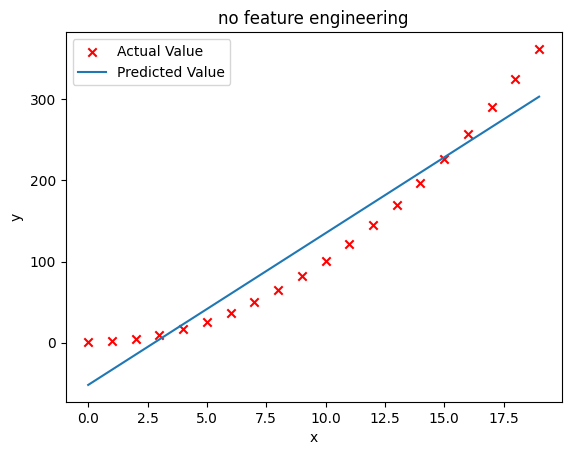

In [3]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')

plt.title('no feature engineering')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


In [4]:
x = np.arange(0, 20, 1)
y = 1 + x**2

X = x**2
X = X.reshape(-1, 1)

n, d = X.shape
initial_w = np.zeros(d)
initial_b = 0.0

model_w, model_b = gradient_descent_feng(X, y, initial_w, initial_b, alpha=1e-5, num_iters=10000)
print(f"w, b found by gradient descent: {model_w}, {model_b}")

Iteration      0, Cost: 7.32922e+03
Iteration   1000, Cost: 2.24844e-01
Iteration   2000, Cost: 2.22795e-01
Iteration   3000, Cost: 2.20764e-01
Iteration   4000, Cost: 2.18752e-01
Iteration   5000, Cost: 2.16758e-01
Iteration   6000, Cost: 2.14782e-01
Iteration   7000, Cost: 2.12824e-01
Iteration   8000, Cost: 2.10884e-01
Iteration   9000, Cost: 2.08962e-01
w, b found by gradient descent: [1.00417494], 0.04896443659681638


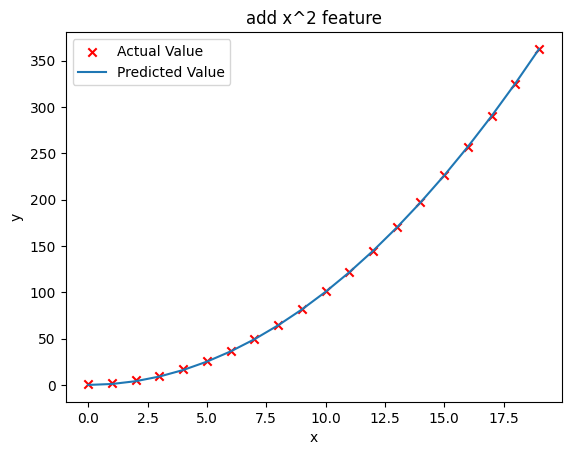

In [5]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')

plt.title('add x^2 feature')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

### Selecting features


$$ y = w_0 x_0 + w_1 x_1^2 + w_2 x_2^3 + b$$

In [6]:
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3]
X.shape

(20, 3)

In [7]:
n, d = X.shape
initial_w = np.zeros(d)
initial_b = 0.0

model_w, model_b = gradient_descent_feng(X, y, initial_w, initial_b, alpha=1e-7, num_iters=10000)
print(f"w, b found by gradient descent: {model_w}, {model_b}")

Iteration      0, Cost: 1.14029e+03


Iteration   1000, Cost: 3.28539e+02
Iteration   2000, Cost: 2.80443e+02
Iteration   3000, Cost: 2.39389e+02
Iteration   4000, Cost: 2.04344e+02
Iteration   5000, Cost: 1.74430e+02
Iteration   6000, Cost: 1.48896e+02
Iteration   7000, Cost: 1.27100e+02
Iteration   8000, Cost: 1.08495e+02
Iteration   9000, Cost: 9.26132e+01
w, b found by gradient descent: [0.08237526 0.53552137 0.02752216], 0.01056185052956357


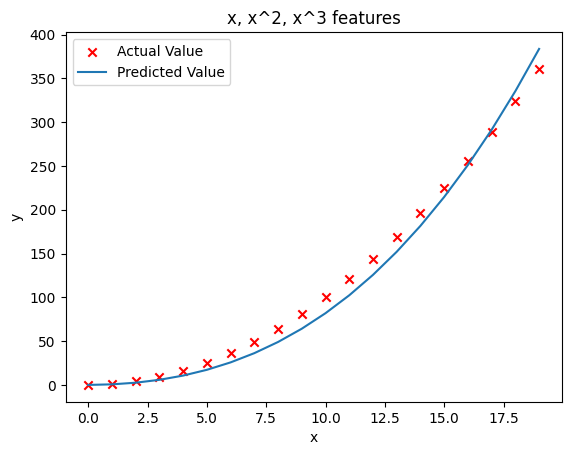

In [8]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')

plt.title('x, x^2, x^3 features')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

### An alternate view

In [9]:
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3]
X_features = ['x', 'x^2', 'x^3']

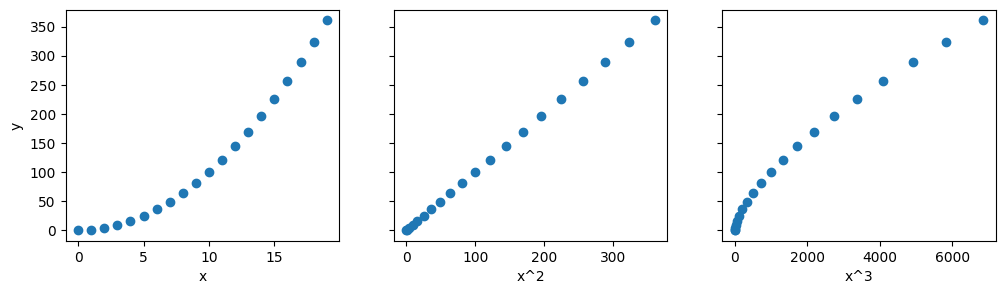

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('y')
plt.show()

### Scaling features

In [11]:
x = np.arange(0, 20, 1)
X = np.c_[x, x**2, x**3]
print('Peak to Peak range by column in Raw          X:', np.ptp(X, axis=0))

X = zscore_normalize_features(X)
print('Peak to Peak range by column in Normalized   X:', np.ptp(X, axis=0))

Peak to Peak range by column in Raw          X: [  19  361 6859]
Peak to Peak range by column in Normalized   X: [3.29501788 3.18076489 3.28307153]


In [14]:
n, d = X.shape
initial_w = np.zeros(d)
initial_b = 0.0

model_w, model_b = gradient_descent_feng(X, y, initial_w, initial_b, alpha=1e-1, num_iters=100000)
print(f"w, b found by gradient descent: {model_w}, {model_b}")

Iteration      0, Cost: 9.42147e+03
Iteration  10000, Cost: 3.90938e-01
Iteration  20000, Cost: 2.78389e-02
Iteration  30000, Cost: 1.98242e-03
Iteration  40000, Cost: 1.41169e-04
Iteration  50000, Cost: 1.00527e-05
Iteration  60000, Cost: 7.15855e-07
Iteration  70000, Cost: 5.09763e-08
Iteration  80000, Cost: 3.63004e-09
Iteration  90000, Cost: 2.58497e-10
w, b found by gradient descent: [5.26616826e-05 1.13494579e+02 8.43238777e-05], 123.49999999999994


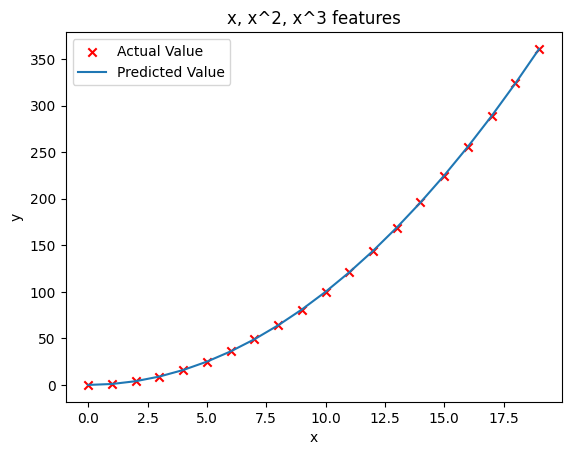

In [15]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')

plt.title('normalized x, x^2, x^3 features')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

### Complex functions


In [16]:
x = np.arange(0, 20, 1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

In [17]:
n, d = X.shape
initial_w = np.zeros(d)
initial_b = 0.0

model_w, model_b = gradient_descent_feng(X, y, initial_w, initial_b, alpha=1e-1, num_iters=1000000)
print(f"w, b found by gradient descent: {model_w}, {model_b}")

Iteration      0, Cost: 2.20188e-01
Iteration 100000, Cost: 1.70074e-02
Iteration 200000, Cost: 1.27603e-02
Iteration 300000, Cost: 9.73032e-03
Iteration 400000, Cost: 7.56440e-03
Iteration 500000, Cost: 6.01412e-03
Iteration 600000, Cost: 4.90251e-03
Iteration 700000, Cost: 4.10351e-03
Iteration 800000, Cost: 3.52730e-03
Iteration 900000, Cost: 3.10989e-03
w, b found by gradient descent: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], -0.0072871948558394


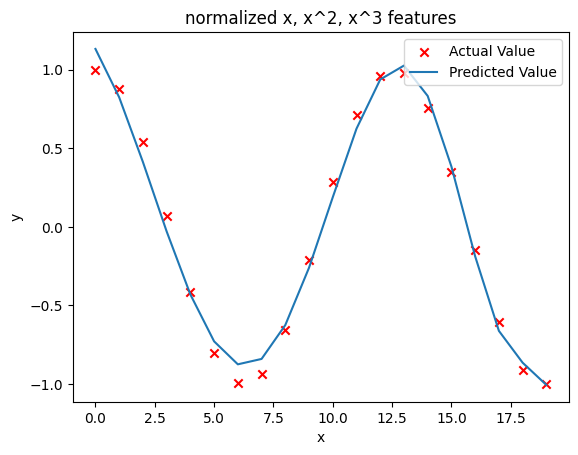

In [18]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')

plt.title('normalized x, x^2, x^3 features')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()